In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

We can find 4 different way to segment an image using OpenCV or/ and sckitlearn:

    - Image segmentation by Kmeans
    - Image segmentation by edge detection
    - Image segmentation by color masking


# Image segmentation by Kmeans

In [5]:
land = cv2.imread("land.jpg")
cass = cv2.imread("cassiope.png")
ball = cv2.imread("ball.jpg")

(562, 836, 3)


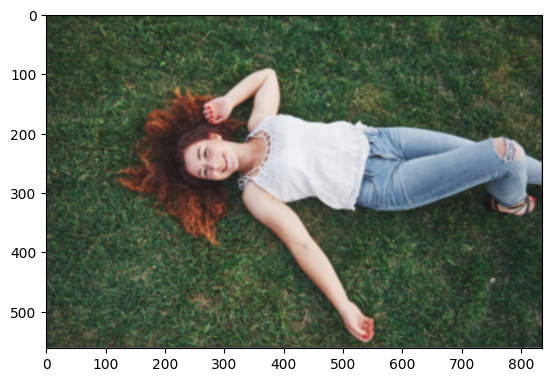

In [12]:

img_brg = cv2.cvtColor(cass, cv2.COLOR_BGR2RGB)
plt.imshow(img_brg)
print(cass.shape)

## Preprocessing

We reshaped the image from (x, x, 3) to (X*X, 3) and convert it to float datatype

In [7]:
to2dim_img = img_brg.reshape((-1, 3))
to2dim_img = np.float32(to2dim_img)

## Defining Kmean hyperparameter

Now we define the criteria of segmentation, the rules with the Kmeans algorithm use to clusterpixels

In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) #  tuple of type, max_iteration and epsilon of the criteria
K = 2  # initial K differente cluster
attempts=10 # nbre of attempts

## Applying Kmeans for Image Segmentation

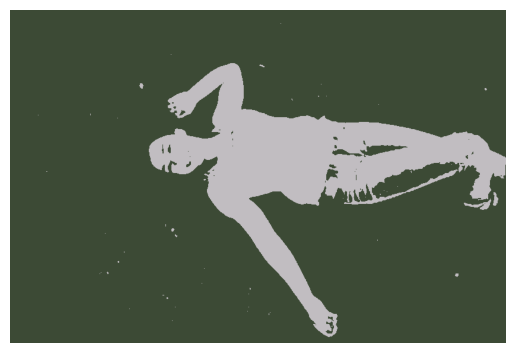

In [9]:
ret, labels, center = cv2.kmeans(to2dim_img, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[labels.flatten()]
result_img = res.reshape((img_brg.shape))

plt.axis('off')
plt.imshow(result_img)

La segmentation Kmeans on ne parvient pas le cheveau de la femme donc il s'avére inefficace

# Image Segmentation using Contour Detection

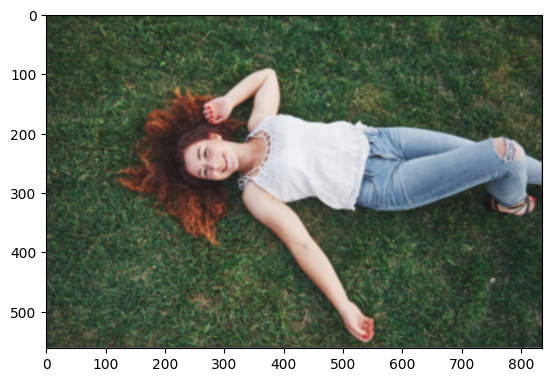

In [14]:

img_brg = cv2.cvtColor(cass, cv2.COLOR_BGR2RGB)
#img_brg = cv2.resize(img_brg,(256,256))
plt.imshow(img_brg)  

## Applying image thresholding 

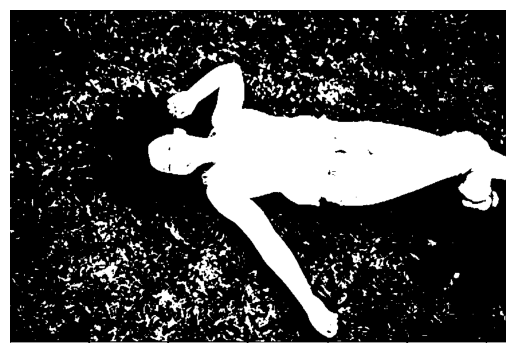

In [21]:
gray = cv2.cvtColor(cass,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(thresh, cmap="gray")

## Drawing countour

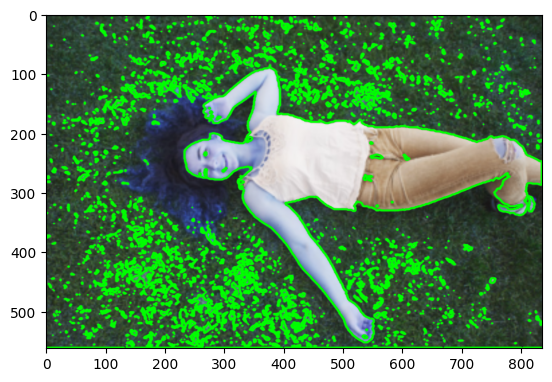

In [27]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = cass.copy()
cass_countour= cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

plt.imshow(cass_countour)
     

Le cheveux sont toujours pas pris en compte
pour les micro objet detecter au passage on peut appliquer un nettoyage par morphology : par example un ouverture pour eliminer les eliminer

Image Segeùentation by Color Masking